In [1]:
from pyproj import CRS
from distancetoroad import DistanceToRoad
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#create an instance of the DistanceToRoad class
dtr = DistanceToRoad()

#we need to specify the coordinate system we'll be converting to
#(lat/long aren't ideal as they aren't equal distance)
crs_proj = CRS("EPSG:3857")
#we download our data, we specify the bounding box, the coordinate system & optionally the margin.
#we can also specify the internal grid spacing and also force a refresh of the cache.
#without the refresh things like the actual roads won't be available, which we use later
#for plotting.
#the low res choice of spacing=100 allows one to see in the plot later the effect of this
#approximation. ~25m is probably as detailed as you need.
dtr.download(0.31,32.55,0.33,32.57,crs_proj,margin=0,spacing=40,refreshcache=True)

Cache not found. Downloading from OSM Overpass...
Download complete. Transforming coordinate system.
Building distance grid


In [2]:
#compute distance to road from a point
dtr.get_dist([3623660, 34540])

126.93499654692152

Here we compute a grid of data to render. 

In [3]:
#space points 10m apart...
xs = np.arange(dtr.box[0,0],dtr.box[1,0],10)
ys = np.arange(dtr.box[0,1],dtr.box[1,1],10)
distancegrid = np.zeros([len(xs),len(ys)])
allps = []
allds = []
for xi,x in enumerate(xs):
    print("%4d%%" % (int(100*(xi+1)/len(xs))),end="\r")
    for yi,y in enumerate(ys):
        allps.append([x,y])
        allds.append(dtr.get_dist([x,y]))

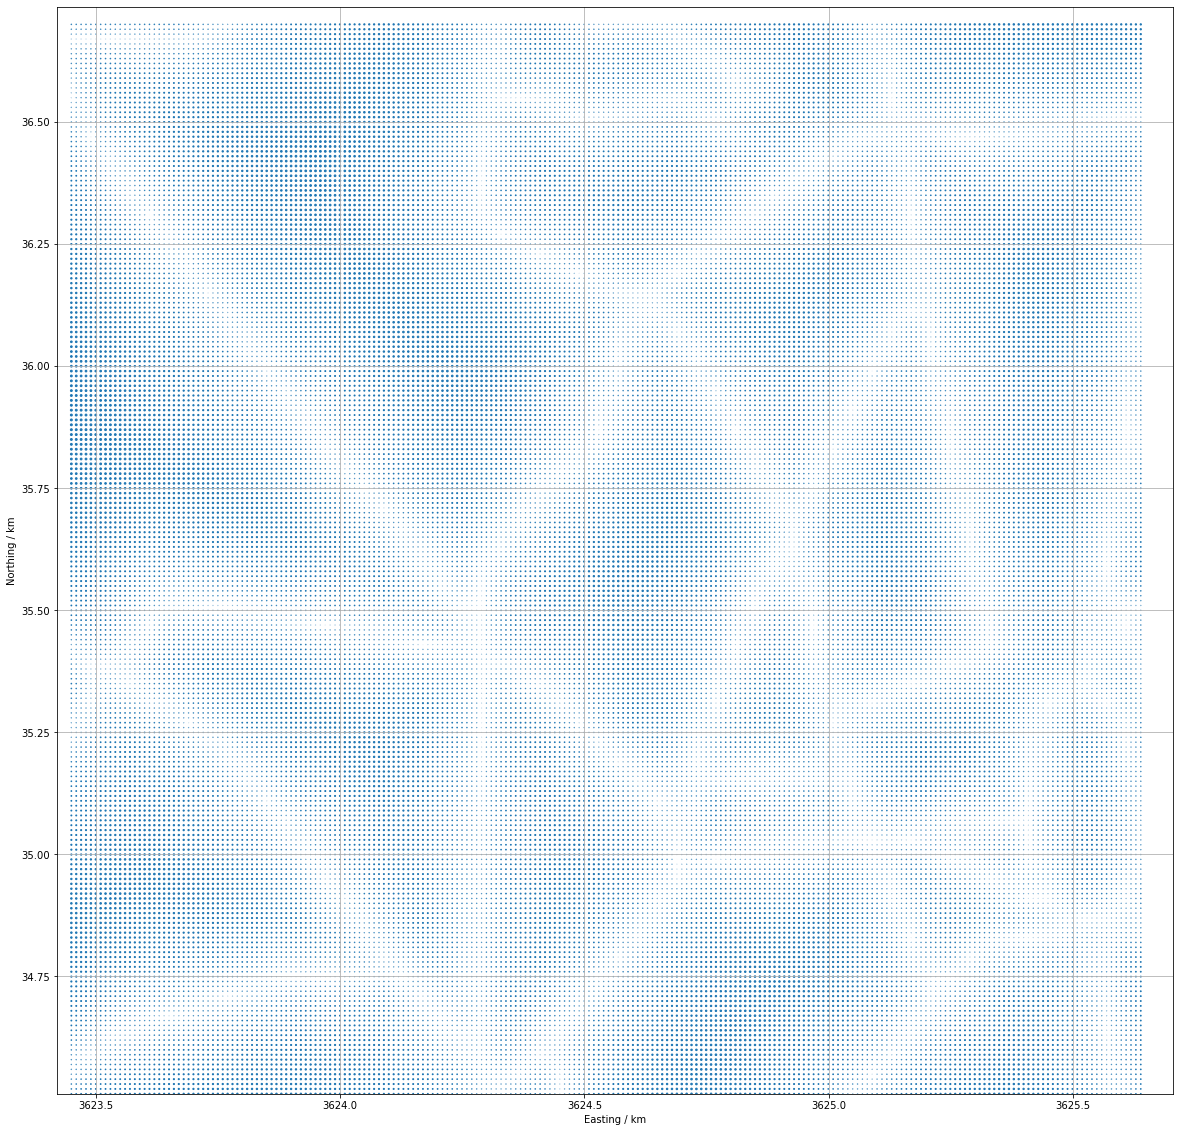

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[20,20])
#for path in dtr.converted_ways:
#    plt.plot(path[:,0]/1e3,path[:,1]/1e3,'-b.')
    
allps = np.array(allps)
allds = np.array(allds)
plt.scatter(allps[:,0]/1e3,allps[:,1]/1e3,allds/100)
plt.grid()
plt.axis('equal')
plt.xlim(dtr.box[:,0]/1e3)
plt.ylim(dtr.box[:,1]/1e3)
plt.xlabel('Easting / km');
plt.ylabel('Northing / km');